**Train Random Forest Model**

1. import Python packages and training data

In [1]:
# adding required libraries
import pandas as pd
import numpy as np

2. Load the dataset for model training

In [2]:
# Load the data from csv
x_data =pd.read_csv('../data/interim/x_data.csv')
y_data =pd.read_csv('../data/interim/y_data.csv')
x_oversample =pd.read_csv('../data/interim/x_oversample.csv')
y_oversample =pd.read_csv('../data/interim/y_oversample.csv')
x_undersample =pd.read_csv('../data/interim/x_undersample.csv')
y_undersample =pd.read_csv('../data/interim/y_undersample.csv')
x_test =pd.read_csv('../data/interim/x_test.csv')
y_test =pd.read_csv('../data/interim/y_test.csv')


3. Set up baseline model

In [3]:
# find the most occuring value and use it as base model
y_mode = y_data.mode()
y_shape = (len(x_data), 1)
y_base = np.full(y_shape, y_mode)

In [4]:
# calculate the accuracy score of the base model
from sklearn.metrics import accuracy_score
accuracy_score(y_data, y_base)

0.8258791396381018

4. Train Random Forest model

In [5]:
from sklearn.ensemble import RandomForestClassifier
datasets = [(x_data, y_data), (x_oversample, y_oversample), (x_undersample, y_undersample)]
models = []

for i, (x, y) in enumerate(datasets):
    rf_model = RandomForestClassifier(random_state=8)
    rf_model.fit(x, y.values.ravel())
    models.append(rf_model)
    print(f'Training score for dataset {i+1}: {rf_model.score(x, y)}')
    print(f'Test score for dataset {i+1}: {rf_model.score(x_test, y_test)}')
    print(f'Accuracy for dataset {i+1}: {accuracy_score(y_test, rf_model.predict(x_test))}')

# Accessing the models
rf_model_org = models[0]
rf_model_over = models[1]
rf_model_under = models[2]

Training score for dataset 1: 1.0
Test score for dataset 1: 0.8327645051194539
Accuracy for dataset 1: 0.8327645051194539
Training score for dataset 2: 1.0
Test score for dataset 2: 0.8
Accuracy for dataset 2: 0.8
Training score for dataset 3: 1.0
Test score for dataset 3: 0.6013651877133106
Accuracy for dataset 3: 0.6013651877133106


5. Perform grid search for optimised parameters

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_features': [None, 'sqrt', 'log2'],
    'max_depth': [4, 8, 16],
    'min_samples_leaf':[1, 2, 4]
}

best_params_list = []

for i, (x, y) in enumerate(datasets):
    rf = RandomForestClassifier(random_state=8)
    grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
    grid_search.fit(x, y.values.ravel())
    best_params = grid_search.best_params_
    best_params_list.append(best_params)
    print(f"Best parameters for dataset {i+1}: {best_params}")


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best parameters for dataset 1: {'max_depth': 4, 'max_features': None, 'min_samples_leaf': 1, 'n_estimators': 100}
Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best parameters for dataset 2: {'max_depth': 16, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'n_estimators': 500}
Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best parameters for dataset 3: {'max_depth': 4, 'max_features': None, 'min_samples_leaf': 2, 'n_estimators': 200}


In [7]:
# For each dataset, use the best parameters to train a new model and evaluate its performance
best_models = []
for i, (x, y) in enumerate(datasets):
    best_params = best_params_list[i]
    rf_model = RandomForestClassifier(**best_params, random_state=8)
    rf_model.fit(x, y.values.ravel())
    best_models.append(rf_model)
    print(f'Training score for dataset {i+1}: {rf_model.score(x, y)}')
    print(f'Test score for dataset {i+1}: {rf_model.score(x_test, y_test)}')
    print(f'Accuracy for dataset {i+1}: {accuracy_score(y_test, rf_model.predict(x_test))}')

Training score for dataset 1: 0.8287811539774668
Test score for dataset 1: 0.8361774744027304
Accuracy for dataset 1: 0.8361774744027304
Training score for dataset 2: 0.9983464241422075
Test score for dataset 2: 0.7904436860068259
Accuracy for dataset 2: 0.7904436860068259
Training score for dataset 3: 0.6877450980392157
Test score for dataset 3: 0.5890784982935153
Accuracy for dataset 3: 0.5890784982935153


5. Check feature importance

In [8]:
# get feature importance
for i, model in enumerate(best_models):
    # get feature importance
    feature_importance = model.feature_importances_

    # create a dataframe for better visualization
    feature_importance_df = pd.DataFrame({
        'Feature': datasets[i][0].columns,
        'Importance': feature_importance
    }).sort_values(by='Importance', ascending=False)

    # display the feature importance
    print(f"Feature importance for model {i+1}:")
    print(feature_importance_df)


Feature importance for model 1:
    Feature  Importance
0        GP    0.498242
5       FG%    0.109397
11      FT%    0.043591
12     OREB    0.038032
2       PTS    0.033874
9       FTM    0.031369
10      FTA    0.029339
17      BLK    0.026041
1       MIN    0.023824
8       3P%    0.022980
18      TOV    0.022365
13     DREB    0.021426
15      AST    0.021129
3       FGM    0.020549
14      REB    0.018162
7       3PA    0.014065
4       FGA    0.011695
16      STL    0.008647
6   3P Made    0.005272
Feature importance for model 2:
    Feature  Importance
17      BLK    0.111343
0        GP    0.099474
9       FTM    0.058179
12     OREB    0.058028
16      STL    0.056962
11      FT%    0.053401
3       FGM    0.050552
8       3P%    0.048251
10      FTA    0.048147
5       FG%    0.047554
15      AST    0.044280
18      TOV    0.043596
6   3P Made    0.042464
13     DREB    0.042380
1       MIN    0.042180
2       PTS    0.039917
14      REB    0.038905
7       3PA    0.037591


In [10]:
# Drop features with importance less than 0.02 for each model
threshold = 0.04
datasets_filtered = []

for i, (x, y) in enumerate(datasets):
    model = best_models[i]
    feature_importance = model.feature_importances_
    important_features = x.columns[feature_importance >= threshold]
    x_filtered = x[important_features]
    datasets_filtered.append((x_filtered, y))
    print(f"Dataset {i+1} filtered features:")
    print(important_features)

Dataset 1 filtered features:
Index(['GP', 'FG%', 'FT%'], dtype='object')
Dataset 2 filtered features:
Index(['GP', 'MIN', 'FGM', 'FG%', '3P Made', '3P%', 'FTM', 'FTA', 'FT%',
       'OREB', 'DREB', 'AST', 'STL', 'BLK', 'TOV'],
      dtype='object')
Dataset 3 filtered features:
Index(['GP', 'FG%', 'FT%', 'OREB', 'REB', 'BLK'], dtype='object')


In [11]:
# Perform grid search for optimized parameters on filtered datasets
filtered_best_params_list = []

for i, (x, y) in enumerate(datasets_filtered):
    rf = RandomForestClassifier(random_state=8)
    grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
    grid_search.fit(x, y.values.ravel())
    best_params = grid_search.best_params_
    filtered_best_params_list.append(best_params)
    print(f"Best parameters for filtered dataset {i+1}: {best_params}")

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best parameters for filtered dataset 1: {'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'n_estimators': 100}
Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best parameters for filtered dataset 2: {'max_depth': 16, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'n_estimators': 500}
Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best parameters for filtered dataset 3: {'max_depth': 4, 'max_features': None, 'min_samples_leaf': 4, 'n_estimators': 100}


In [12]:
# Train and evaluate a model for each filtered dataset using the best parameters
filtered_best_models = []

for i, (x, y) in enumerate(datasets_filtered):
    best_params = filtered_best_params_list[i]
    rf_model = RandomForestClassifier(**best_params, random_state=8)
    rf_model.fit(x, y.values.ravel())
    filtered_best_models.append(rf_model)
    print(f'Training score for filtered dataset {i+1}: {rf_model.score(x, y)}')
    print(f'Test score for filtered dataset {i+1}: {rf_model.score(x_test[x.columns], y_test)}')
    print(f'Accuracy for filtered dataset {i+1}: {accuracy_score(y_test, rf_model.predict(x_test[x.columns]))}')

Training score for filtered dataset 1: 0.8263912598156368
Test score for filtered dataset 1: 0.8354948805460751
Accuracy for filtered dataset 1: 0.8354948805460751
Training score for filtered dataset 2: 0.9985531211244316
Test score for filtered dataset 2: 0.7918088737201365
Accuracy for filtered dataset 2: 0.7918088737201365
Training score for filtered dataset 3: 0.675
Test score for filtered dataset 3: 0.6
Accuracy for filtered dataset 3: 0.6


6. Seems the model using original dataset and best parameters is the best model. Exam the model with diagrams

In [15]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

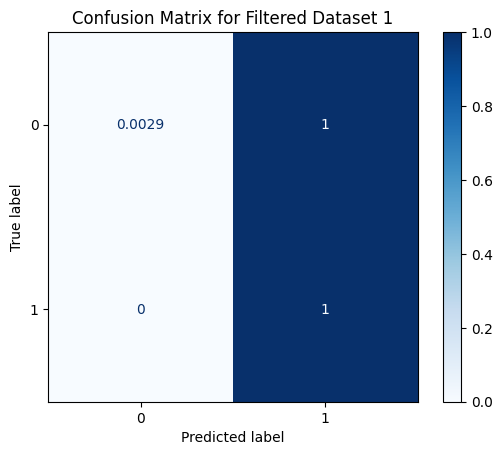

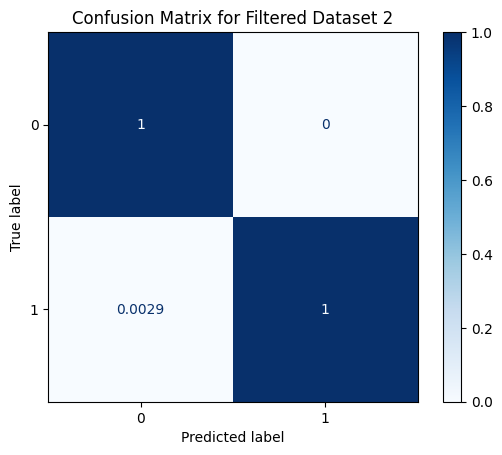

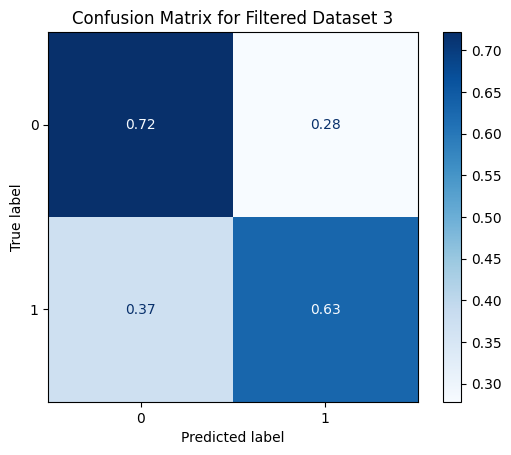

In [17]:
for i, (x, y) in enumerate(datasets_filtered):
    ConfusionMatrixDisplay.from_estimator(filtered_best_models[i], x, y, cmap=plt.cm.Blues, normalize='true')
    plt.title(f'Confusion Matrix for Filtered Dataset {i+1}')
    plt.show()

6. Conclusion
This is a better model compare to SVM model, but the accuracy is not high enough. 

7. Export Model

In [67]:
import joblib

# Export the Random Forest model
joblib.dump(best_models[0], '../models/rf_model.pkl')

['../models/rf_model.pkl']